# CSCI 3022 Final Project: 
# World Health Predictors and Life Expectancy
## By Leah Dillard

## Problem: 
World health is at the epicenter of public information via the news media ever since the Coronavirus pandemic. However, despite the craze, it is still important to highlight the baselines of health, which include socioeconomic and disease data! These issues and their relationship to lower life expectancy will be explored in the context of developed vs developing countries.  

## Motivation:
The main goal is to determine if GDP (external threat) has a more profound impact on life expectancy of adults than disease/BMI (internal threat) per populous using regression analysis (Multiple linear regression), and draw conclusions to what trending data might suggest in the future.

## Dataset: 
- Link: https://www.kaggle.com/code/mathchi/life-expectancy-who-with-several-ml-techniques/data
- This Dataset has been compiled from information merged by the World Health Organization and the United Nations website, including data from 193 countries. All of the factors involved are directly related to health, but the United Nations includes data that is socioeconomic in nature as well. 
- This dataset is large, with 22 Columns and 2938 rows and 20 predicting variables. 
- There are 18 numerical and 2 categorical features.
- Not all data was able to be acquired, so less known countries like Vanuatu, Tonga, Togo, Cabo Verde were not included due to lack of accurate information.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from scipy import stats
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

np.seterr(divide = 'ignore') 
pd.options.mode.chained_assignment = None

In [2]:
#Load dataset
original_df = pd.read_csv('Life Expectancy Data.csv')
#look at all. columns
original_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Types
By getting the size and types of each data column, we can further understand how to go about cleaning the data.

In [3]:
original_df.shape

(2938, 22)

In [4]:
original_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

## Data Cleaning / EDA
- As previously stated, since the dataset is so large I will be omitting variables that are not applicable to my study, such as schooling, income, and disease along with infant and child deaths because I am focusing on adults.
- NANS will be checked as well as duplicate data, and then each countries rows will be counted to see if there are a similar number after NANS are removed.

In [5]:
original_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


From this describe we can see there is not a uniform count per column, so it is important to proceed with this in mind. Maybe we can drop these columns if they are irrelevant or remove NAN values to see if it solves the issue.

### Drop Irrelevant Columns

Since this study is focusing on adults, the columns about children can be dropped as they are non-factors.

In [6]:
#clean if population is null,  bmi is null
#delete everything that doesnt have to do with adults
df = original_df.drop(columns=['Schooling','Total expenditure', 'Income composition of resources', ' thinness  1-19 years',' thinness 5-9 years', 'infant deaths','under-five deaths '])

### Dropping NAN Values

In [7]:
nans = df.isna().sum()
print(nans)
print("Percent of dataset with NAN values: ", (len(nans) / len(df)) *100 , "%")

Country                     0
Year                        0
Status                      0
Life expectancy            10
Adult Mortality            10
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
 BMI                       34
Polio                      19
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
Population                652
dtype: int64
Percent of dataset with NAN values:  0.5105513955071478 %


- Since there are so many rows that have nan values, it would be wise to remove all of them from the dataset and then sort all information by country to obtain averages.

In [8]:
df.dropna(how='any', inplace=True)
df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
df.replace('nan', 0)
df.fillna(0)
nans = df.isna().sum()
print(nans)

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
 BMI                      0
Polio                     0
Diphtheria                0
 HIV/AIDS                 0
GDP                       0
Population                0
dtype: int64


### Duplicate Values

Now since we cleaned out the NAN values, it is important to check for duplicate values, and there are none!

In [9]:
print(any(df.duplicated()))

False


## Outliers

### Remove Outlier Countries

Lastly, let's sort through countries to make sure the eliminated information does not effect the outcome. For the countries that do not have enough data to include (and will have many columns filled with 0), I will be removing the bottom 30%, so countries with 4/16 rows. By counting each countries rows(each should have 16) we can elimiate those that lacked information:

In [10]:
pd.set_option('display.max_rows', 200)
count = df.groupby(['Country']).size()
print(count<5)

Country
Afghanistan                 False
Albania                     False
Algeria                     False
Angola                      False
Argentina                   False
Armenia                     False
Australia                   False
Austria                     False
Azerbaijan                  False
Bangladesh                  False
Belarus                     False
Belgium                     False
Belize                      False
Benin                       False
Bhutan                      False
Bosnia and Herzegovina      False
Botswana                    False
Brazil                      False
Bulgaria                    False
Burkina Faso                False
Burundi                     False
Cabo Verde                  False
Cambodia                    False
Cameroon                    False
Canada                      False
Central African Republic    False
Chad                        False
Chile                       False
China                       False
Colomb

After running a row count per country, it is clear that 10 countries have only 1 row. Therefore, it is crucial to remove them from the study because the data will not be uniform. Below Tuvalu, San Marino, St. Lucia, Palau, Niue, Nauru, Monaco, Marshall Islands, Dominica and Costa Rica will be removed.

In [11]:
#find index and sort by country
df = df.set_index("Country")
#drop country names that return true
df =  df.drop(["Sweden", "Netherlands", "Haiti", "Equatorial Guinea"])
print("Old Dataset Row Count: ", len(original_df))
print("Cleaned Dataset Row Count: ", len(df))

Old Dataset Row Count:  2938
Cleaned Dataset Row Count:  1638


#### From the data cleaning, 1300 rows and 7 columns were removed!

## More EDA

Diving deeper into data analysis apart from simple removal and cleaning of NAN's and INF's, EDA analysis is used mainly to find patterns and identify anomalies in order to solidify a hypothesis by summarizing the data. By doing this, further knowledge on the dataset is gained as well as the structure. For this problem, it is important to see which variables are highly correlated. In order to do this, generating a correlation matrix will be most beneficial.

### Correlation Matrix

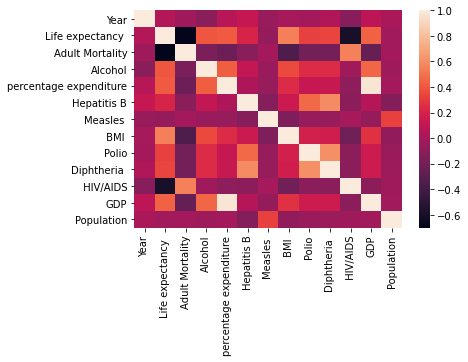

In [12]:
#create correlation matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix)
plt.show()

From the correlation matrix, we can see which features correlate and to life expectancy and which do not. The factor that sticks out the most in terms of disease is HIV, along with BMI and GDP since they have a light colored box. These factors fit in well with the hypothesis, as the goal is to measure if socioeconomic or physical health factors affect life expectancy more. To get a better idea, let's generate highly correlated features:

### Feature Importance

<AxesSubplot:title={'center':'Adult Mortality Relevant Features'}>

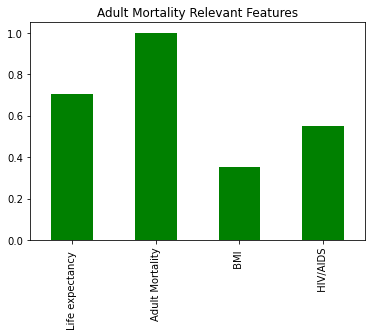

In [13]:
cor_target = abs(corrMatrix["Adult Mortality"])
relevant_features = cor_target[cor_target>0.3]
relevant_features.plot(kind='bar', color ='green', title='Adult Mortality Relevant Features')

<AxesSubplot:title={'center':'Life Expectancy Relevant Features'}>

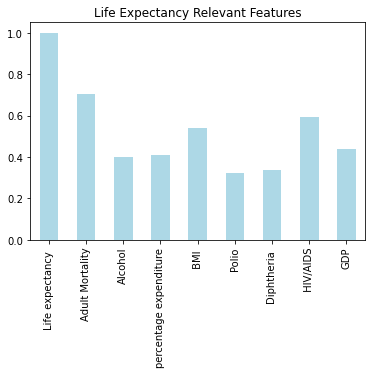

In [14]:
cor_target = abs(corrMatrix["Life expectancy "])
relevant_features = cor_target[cor_target>0.3]
relevant_features.plot(kind='bar', color='lightblue',title='Life Expectancy Relevant Features')

#### Feature Importance Discussion
Factors with features that have a correlation target value greater than 0.3 have relevant factors. I chose to print out a importance graph for Adult Mortality as well, since life expectancy and mortality go hand in hand in most aspects. Between the two, BMI and HIV are the most important features. Alcohol only appears as correlated with life expectancy, so BMI has a way stronger correlation in terms of both factors. Since life expectancy has more relevant factors, it will be the dependent variable, with BMI, HIV/AIDS and GDP as the independent variables. Next, let's make a histogram to visualize the normality of the data.

### Histogram

In [15]:
#FIX COLUMN NAMES
df.columns = df.columns.str.replace(' ', '')
df['HIV']=df['HIV/AIDS']
columns = df.columns
print(columns)

Index(['Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'Alcohol',
       'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'HIV'],
      dtype='object')


<AxesSubplot:>

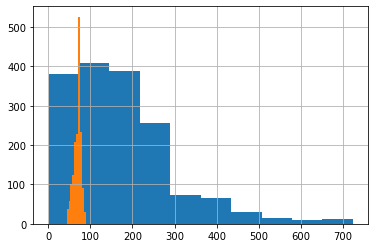

In [16]:
df['AdultMortality'].hist()
df['Lifeexpectancy'].hist()

From this histogram, it is clear that the data is not normally distributed. So, let's normalize the data for all numerical columns

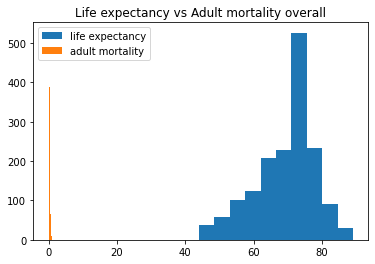

In [17]:
x = df.iloc[:,3:20]
df.iloc[:,3:20] = (x-x.min())/ (x.max() - x.min())
plt.hist(df['Lifeexpectancy'], label = "life expectancy")
plt.hist(df['AdultMortality'], label = 'adult mortality')
plt.title(label='Life expectancy vs Adult mortality overall')
plt.legend()

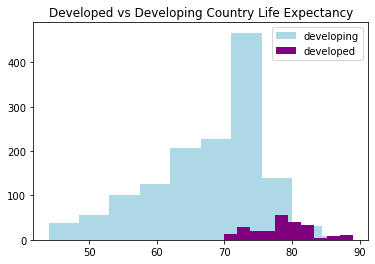

In [18]:
developed= df.loc[df['Status'] == 'Developed', 'Lifeexpectancy']
developing= df.loc[df['Status'] == 'Developing', 'Lifeexpectancy']
plt.hist(developing, label = 'developing', color = "lightblue")
plt.hist(developed, label = "developed", color = "purple")
plt.title(label='Developed vs Developing Country Life Expectancy')
plt.legend()

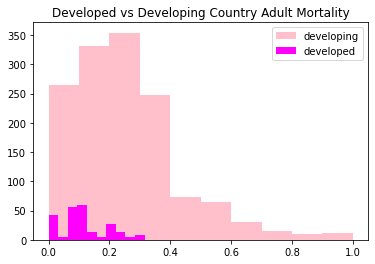

In [19]:
developed= df.loc[df['Status'] == 'Developed', 'AdultMortality']
developing= df.loc[df['Status'] == 'Developing', 'AdultMortality']
plt.hist(developing, label = 'developing', color = "pink")
plt.hist(developed, label = "developed", color = "magenta")
plt.title(label='Developed vs Developing Country Adult Mortality')
plt.legend()

#### Histogram Discussion
The first two histograms are helpful because they show that the data is not intrinsically normal, but it can be transformed to a more normal fit. The third plot and fourth plot show the life expectancy and mortality between developing and developed countries, which is at the heart of the data study. Clearly, developing countries have a higher adult mortality rate than developed countries. And, developed countries have a higher life expectancy grouping than developing countries as well. All of the data seems to be aligning so far, now we just need to see what the biggest contributing factors are to this difference.

## EDA Discussion/ Summary

From the data analysis, it is clear that the data is not normal, and that in terms of answering the question, life expectancy is more correlated to various variables involved than mortality. In this case, I will use life expectancy instead of mortality to accurately draw conclusions per the data. Additionally, after normalizing it seems that life expectancy is right skewed while adult mortality is left skewed, indicating a higher life expectancy and lower mortality rate overall. On the correlation matrix, since the darker the values are, the less correlated they seem, it is important to note that population seems to be the most generally correlated of the variables across the board. In terms of life expectancy, BMI is more correlated than disease, and GDP is highly correlated to life expectancy (even moreso than alcohol!). After normalizing the data, the distribution of data shows that developed countries have higher life expectancy and lower mortality, as predicted, while developing countries have much higher mortality rates overall in addition to lower life expectancy. The most difficult of this project moving forward will be dealing with these descrepancies in the data, as the gap is pretty large between the two. So, representing both developed and developing countries seperately is very important to find conclusive data instead of lumping them together. Going forward, analyzing with regression techniques seems to be the best possible option. My three independent variables will be BMI, GDP, and HIV/AIDS due to what I discovered in the EDA.

## Finding Linearity

As previously stated, I will be using regression analysis to examine the data. It is important to use regression for this model to determine the relationship between the dependent and independent variables. More specifically, to predict the effect of the independent variables on the dependent variable. In this case, the dependent variable is life expectancy. In order to choose a specific type of regression model, I will determine if the data is linear or non-linear. 

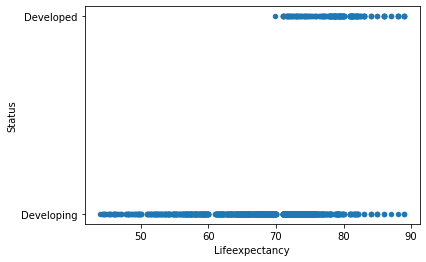

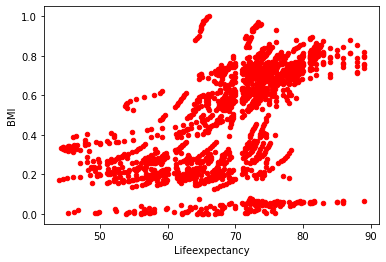

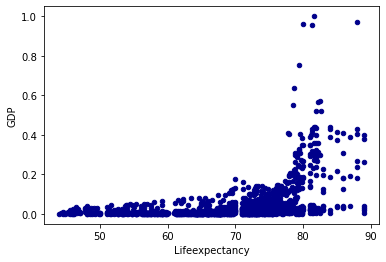

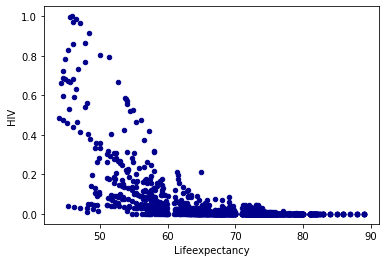

In [20]:
ax0 = df.plot.scatter(x = 'Lifeexpectancy', y = 'Status')
ax1 = df.plot.scatter(x='Lifeexpectancy', y='BMI',c='Red')
ax2 = df.plot.scatter(x='Lifeexpectancy', y='GDP',c='DarkBlue')
ax2 = df.plot.scatter(x='Lifeexpectancy', y='HIV',c='DarkBlue')

From these four plots, it can be determined that the data, and the relationship of factors to life expectancy is not exactly linear. Therefore, I will be transforming the nonlinear data to be more linear and make further predictions through multiple linear regression due to the three independent variables. Since the data is always positive, I will use the logarithmic transformation.

### Log transformations of BMI, GDP, and HIV/AIDS

Year                     0
Status                   0
Lifeexpectancy           0
AdultMortality           0
Alcohol                  0
percentageexpenditure    0
HepatitisB               0
Measles                  0
BMI                      0
Polio                    0
Diphtheria               0
HIV/AIDS                 0
GDP                      0
Population               0
HIV                      0
dtype: int64


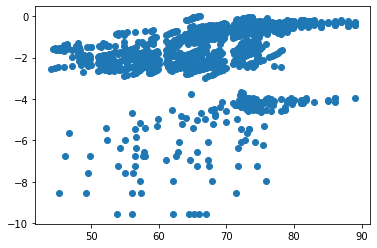

In [21]:
print(df.isna().sum())
x = df['Lifeexpectancy']
df.loc[:, ('BMI')] = np.log2(df['BMI'])
y = df.loc[:, ('BMI')]
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)

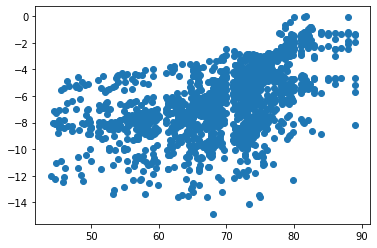

In [22]:
x = df['Lifeexpectancy']
df.loc[:, ('GDP')] = np.log2(df['GDP'])
y = df.loc[:, ('GDP')]
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)

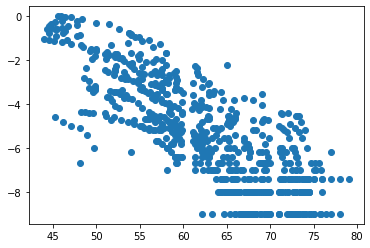

In [23]:
x = df['Lifeexpectancy']
df.loc[:, ('HIV')] = np.log2(df['HIV'])
y = df.loc[:, ('HIV')]
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)

After doing the transformations, we can see that the data is much more linear in nature than before. It was skewed with curves, and now it fits a trend.

# Modeling
## Single OLS Regression

Before diving straight into MLR, it seems important to do single regression with the dependent variable and each independent variable. OLS is commonly used for linear regression by comparing the difference between individual points in the data and the best fit line in order to produce an amount of error. Since this data has not been proven to have variables that directly correlate, I will run single OLS regressions on each independent variable against life expectancy. From this, I will show that going forward with a Multiple Regression Model is necessary.

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     235.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           7.64e-50
Time:                        02:41:33   Log-Likelihood:                -5771.3
No. Observations:                1638   AIC:                         1.155e+04
Df Residuals:                    1636   BIC:                         1.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.3240      0.285    254.127      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


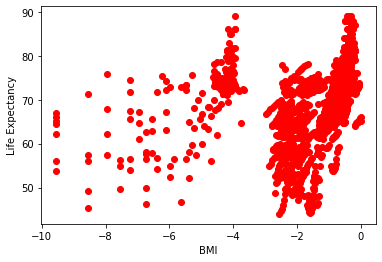

In [24]:
import statsmodels.api as sm
df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).replace(np.nan,0)
Y = df['Lifeexpectancy']
X = df['BMI']
plt.plot(X, Y, 'ro');
plt.xlabel('BMI')
plt.ylabel('Life Expectancy');
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     626.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.43e-117
Time:                        02:41:33   Log-Likelihood:                -5616.1
No. Observations:                1638   AIC:                         1.124e+04
Df Residuals:                    1636   BIC:                         1.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8323      0.498    162.356      0.0

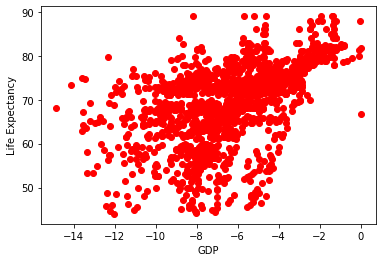

In [25]:
Y = df['Lifeexpectancy']
X = df['GDP']
plt.plot(X, Y, 'ro');
plt.xlabel('GDP')
plt.ylabel('Life Expectancy');
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     181.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           2.30e-39
Time:                        02:41:33   Log-Likelihood:                -5795.3
No. Observations:                1638   AIC:                         1.159e+04
Df Residuals:                    1636   BIC:                         1.161e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.2837      0.255    279.710      0.0

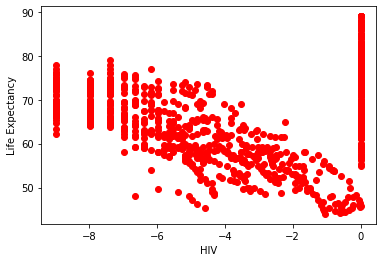

In [26]:
df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
Y = df['Lifeexpectancy']
X = df['HIV']
plt.plot(X, Y, 'ro');
plt.xlabel('HIV')
plt.ylabel('Life Expectancy');
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

#### Interpreting Single OLS results

From the OLS tables above, it can be determined that 10% of the variation in Life expectancy can be explained by HIV/AIDS, 27.7% of the variation in Life expectancy can be explained by GDP, and 12.65% can be explained by BMI. Due to the lack of significance of HIV/AIDS, it will be removed and then we can determine if GDP or BMI is more significant toward lif expectancy. These percentages were taken from the R-squared values, which is the measurement of howm uch the independent variable is explained by changes in the dependent variable- life expectancy. It is clear that the dependent variable can not be explained by only one variable, so multiple regression is the next step. This regression will be linear due to the earlier changes to the nonlinear data. 

## MLR Models

Before starting the MLR models, the formula that was concurrent with OLS findings on a multivariate level was Life Expectancy ~ BMI+GDP+HIV. So, we will be using that throughout the models. First, by formulating a basic regresion plot, we can double check that our data is evenly distributed around the line.

### Polynomial Feature Model

The next model that will be used is the polynomial feature model. This model is a good one to use in order to determine if the underlying data fits an non-linear model better than a linear model.

In [27]:
def format_coefs(coefs):
    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
    equation = "$" +  " + ".join(equation_list) + "$"
    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
    for old, new in replace_map.items():
        equation = equation.replace(old, new)
    return equation

fig = px.scatter(df, x=df['BMI']+df['GDP'], y='Lifeexpectancy', color='Status', opacity=0.65)
for degree in [1, 2, 3, 4]:
    x=df['BMI'].values.reshape(-1,1)+df['GDP'].values.reshape(-1,1)
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
    poly = PolynomialFeatures(degree)
    poly.fit(x)
    X_poly = poly.transform(x)
    x_range_poly = poly.transform(x_range)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, df.Lifeexpectancy)
    y_poly = model.predict(x_range_poly)

    equation = format_coefs(model.coef_.round(2))
    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))

fig.show(renderer='iframe')

#### Polynomial Model Results
From the model, we can tell that our data has a slightly high bias due to the variance (error) trying to fit the data. The ideal would be a low bias and low variance model, but this is pretty hard to achieve so there has to be some compromise in terms of model and transformations. We don't want to over fit this model, either. Since our data was orignially non-linear and it was transformed to be slightly more linear, this might be the outcome fo that transformation. In this case, it is appropriate to stick with a linear model, as the green line fits the data the best. This provides some insight into what could be corrected in a future study of this scenario, and allows us to move on with a degree of 1.

### Estimated Regression Line

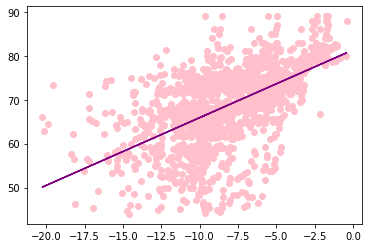

In [43]:
x=df['BMI']+df['GDP']
plt.plot(x, y, 'o', color = 'pink')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = 'purple')

### Linear Regression For Train and Test Data
Taking the basic polyfit regression further, we can split it into test and train data in order to see the spread. This helps to determine if the model is generalizing well with test data, and we can tell if the data is overfitting.

In [29]:
x = df['BMI'].values.reshape(-1,1)+df['GDP'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, df.Lifeexpectancy, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(x.min(), x.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show(renderer='iframe')

#### Linear Regression Discussion
From the two linear regression models produced, it is clear that the data is evenly distributed throughout the plot. So, we know that the data is not being overfit because there is no overwieghting of unimportant variables as the data performs well on underlying data ie. the test data. This will aid in making future predictions.

### K Nearest Neighbors Model
This model will be especially helpful in terms of modeling the independent variables along with the dependent variable to visualize the discrepancy between developing and developed countires. The KNN model is a data classification method that estimates the liklihood of a datapoint becoming a part of its neighbor based on the behavior of the data point nearest to it. This model is important because it takes into account unseen observations and is useful in this scenario since the data is well defined.

In [30]:
x=df['BMI'].values.reshape(-1,1)
x_range = np.linspace(x.min(), x.max(), 100)

knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(x, df['Lifeexpectancy'])
y_dist = knn_dist.predict(x_range.reshape(-1, 1))
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(x, df['Lifeexpectancy'])
y_uni = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x=df['BMI'], y='Lifeexpectancy', color='Status', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))
fig.show(renderer='iframe')

In [31]:
x=df['GDP'].values.reshape(-1,1)
x_range = np.linspace(x.min(), x.max(), 100)

knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(x, df['Lifeexpectancy'])
y_dist = knn_dist.predict(x_range.reshape(-1, 1))
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(x, df['Lifeexpectancy'])
y_uni = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x=df['GDP'], y='Lifeexpectancy', color='Status', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))
fig.show(renderer='iframe')

#### K Nearest Neighbors Discussion
The most important takeaway from this visualization is the distance in feature space. I chose to put Life Expectancy given BMI on one KNN chart with GDP on the other. This visualization is helpful, because in terms of GDP, we can clearly see that developing countires with a low GDP have a worse effect on life expectancy, while developing countries with high BMI have a low life expectancy. The biggest disparity between the two is that developed countries with lower GDP have a higher life expectancy, while developed countries (despite health factors) remain having high life expectancies. This is a significant model with many takeaways. 

### MLR OLS Regression
In order to recognzie the impact of OLS for multiple regression, the intercept and coefficients should be identified in order to make sure they are accurate and that the data is fitted correctly. Then, analyzing the p-value significance will allow a clearer lens into seeing just how significant the independent factors are.

In [32]:
from sklearn import linear_model
x = df[['BMI','GDP']]
y = df['Lifeexpectancy']
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Sklearn Intercept: \n', regr.intercept_)
print('Sklearn Coefficients: \n', regr.coef_)

Sklearn Intercept: 
 81.57276149247318
Sklearn Coefficients: 
 [1.35910329 1.62411168]


In [33]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     402.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          7.23e-143
Time:                        02:41:34   Log-Likelihood:                -5553.7
No. Observations:                1638   AIC:                         1.111e+04
Df Residuals:                    1635   BIC:                         1.113e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.5728      0.484    168.599      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



### OLS MLR Discussion
The results of this OLS MLR are good, because the coefficients from sklearn and the statsmodel OLS library have the same intercept of 81.5727 with coefficients of 1.35910329 and 1.62411168. We can see that this data is Lifeexpectancy given BMI and GDP. This shows that the fit of the model is correct, and we are on the right track. The most important results are the p-value. Since the p-value is <0.05, we can reject the null hypothesis and use our low p-value as a good prediction of our model since that means that changes in the predicting value must be related to changes in the response variable. Therefore, a significant relationship exists.

## Multicollinearilty, Linearity, Normality and Homoscedasticity Check
To ensure the validity of the final model, we should validate it through residual analysis in order to see the difference between observed value and predicted value. First, we will start with Multicollinearity.
### Multicollinearity

Pearson correlation coefficient matrix of each variables:
           BMI       GDP
BMI  1.000000  0.251213
GDP  0.251213  1.000000


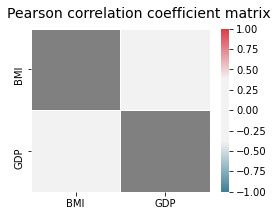

In [34]:
corr = df[['BMI', 'GDP']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)
mask = np.zeros_like(corr)
np.fill_diagonal(mask, val=True)
fig, ax = plt.subplots(figsize=(4, 3))
cmap = sn.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')
sn.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)

#### Multicollinearity Results
This correlation matrix shows almost .25 correlation coefficients between BMI and GDP. This suggests that the independent variables are not impacting or affecting eachother in a significant way, so there is no multicollinearity in the data. We can move on!

### Linearity

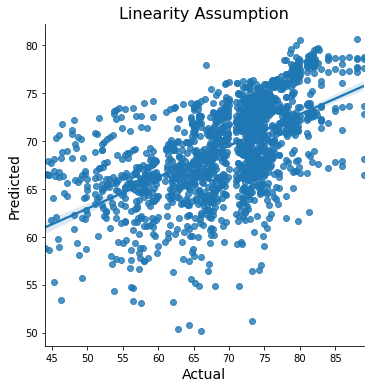

In [35]:
x = df['BMI'].values.reshape(-1,1)+df['GDP'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)
df['predicted'] = model.predict(x)
df['residual'] = df['predicted'] - df['Lifeexpectancy']

sn.lmplot(x='Lifeexpectancy', y='predicted', data=df) 
line_coords = np.arange(df[['Lifeexpectancy', 'predicted']].min().min()-10, df[['Lifeexpectancy', 'predicted']].max().max()+10)
plt.ylabel('Predicted', fontsize=14)
plt.xlabel('Actual', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

#### Linearity Results
Although it looks like a massive blob, the points are spread evenly around the diagonal line so there is an assumed linear realtionship between depenent and independent variables. We can move on!

### Normality

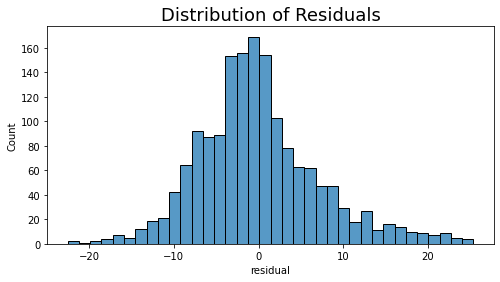

In [36]:
from statsmodels.stats.diagnostic import normal_ad
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sn.histplot(df['residual'])
plt.show()

Text(0.5, 1.0, 'Model Residuals Q-Q Plot')

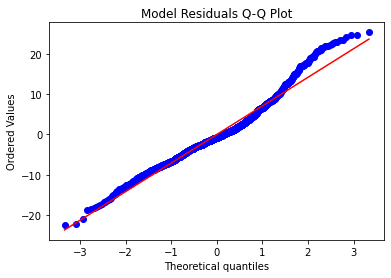

In [37]:
stats.probplot(df['residual'], dist="norm", plot= plt)
plt.title("Model Residuals Q-Q Plot")

#### Normality Results
This histogram has a mean of 0, and while slightly left skewed, it shows a clear bell curve! To solidify the normality assumption, using the Q-Q plot of residuals we can see that it follows along the fit line and is normal. We can move on.

### Homoscedasticity

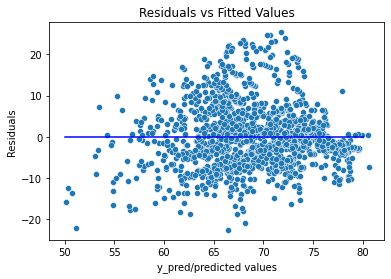

In [38]:
p = sn.scatterplot(x=df['predicted'],y=df['residual'])
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sn.lineplot(x=[50,80],y=[0,0],color='blue')
p = plt.title('Residuals vs Fitted Values') 

### Residual Mean

In [39]:
mean_residuals = np.mean(df['residual'])
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.017462567061126543


Finally, since the mean of residuals is close to 0, and all assumptions were met, the model that was picked was the correct model to use! 

## Prediction Error Analysis / Model Validity
### Residual Plot

Before finalizing and making predictive assumptions, ensuring the trustworthiness of our data through a residual plot and actual vs predictive plot will be key. 

In [40]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(df.index, test_size=.25, random_state=0)
df['split'] = 'train'
df.loc[test_idx, 'split'] = 'test'

x = df[['BMI', 'GDP']]
X_train = df.loc[train_idx, ['BMI', 'GDP']]
y_train = df.loc[train_idx, 'Lifeexpectancy']
model.fit(X_train, y_train)
df['predicted'] = model.predict(x)
df['residual'] = df['predicted'] - df['Lifeexpectancy']

fig = px.scatter(
    df, x='predicted', y='residual',
    marginal_y='violin',
    color='split', trendline='ols'
)
fig.show(renderer='iframe')

#### Residual Plot Error Analysis
This residual plot with its violins shows us that the predicted values and residuals are consistent with the random error. There is no specific pattern to the plot points, which insinuates that we do not need to adjust the model further. This is a good residual plot, because there is a high density of points surrounding the origin of 0, and is symmetric about 0 as well. This satisfies the assumption that our regression model residuals are independent and normally distributed.

### Actual vs. Predicted Plot

Finally, in order to reject the null hypothessis and accept our hypothesis as feasable, showing and actual vs. predicted plot will allow us to see if the points follow along the predicted line, and what the trend might look like in the future.

In [41]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show(renderer='iframe')

#### Actual v Predicted Plot Analysis
From the plot, we can tell that the data is a good fit, as the point are close to the predictive line. We can tell that since the data follows along the line, this is a good model and accurate predictions can be made in the future with this model.

### Confidence Band Predictors

Text(0.5, 1.0, 'GDP v Life Expectancy')

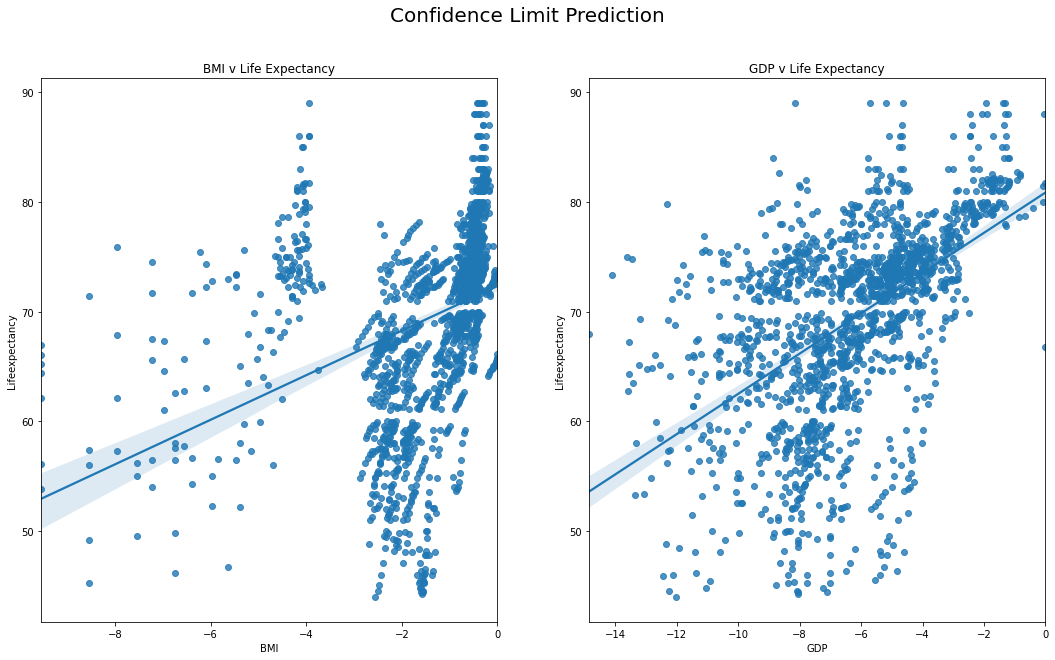

In [42]:
fig, axes = plt.subplots(1, 2,figsize=(18, 10))
fig.suptitle('Confidence Limit Prediction',fontsize=20)
heights = df['BMI']
weights = df['Lifeexpectancy']
sn.regplot(ax=axes[0],x=heights,y=weights)
axes[0].set_title('BMI v Life Expectancy')
heights = df['GDP']
weights = df['Lifeexpectancy']
sn.regplot(ax=axes[1],x=heights,y=weights)
axes[1].set_title('GDP v Life Expectancy')


#### CI Band Results
From these two plots, we can see that there is a bit of a hard read for the data since it is not perfectly linear here. However, working with the results, the 95% confidence intervals for life expectancy are larger the lower that the life expectancy is, and thins out toward the middle. In terms of GDP, there is a much clearer prediction toward lower and mid GDP having an adverse effect on life expectancy. However, there is a larger amount of individuals who have a lower life expectancy that have a high BMI, as the the clusters fall in the band of the confidence intervals.

# Final Discussion
At the beginning of this study, the goal was to determine whether external threats (socioeconomic factors) or internal threats (physical health) had a more profound impact on life expectancy in developing and developed countries. Following the data cleaning and removal of outliers, I found that HIV, BMI and GDP seemed the most significant amongst adults to include in the study based on their feature importance. After graphing the data through histograms, it was clear that developed countries had lower mortality rates while developing countries experienced higher mortality rates. Since life expectancy and mortality work closely together, I chose to use life expectancy as the dependent variable for this study since there were more important features attributed to the significance of the outcome. The data was not inherently linear, and had skewness for each attribute. By using a log transformation, I was able to find more linear modeling and apply it to the final model. To start with modeling, I chose single OLS regression before applying all of the independent variables to a MLR model. From this, I found that HIV did not have a significant impact on the data and removed it. This left me with BMI and GDP, two variables that affect everyone across the globe, while HIV might not affect every individual, making it a good choice for removing HIV. I started with a polynomial feature model to make sure that the data was fitted best for a linear model with MLR, and this was true. However, if I could edit anything about this study, it would be to fit the data with a degree of 2 and not fit it to be linear. Next, I made linear regression models for train and test data, which showed that the data fit around the best fit line, allowing me to move forward toward a more predictive model. The next and most significant model for this scenario was the KNN model, which showed the developed and developing country data in terms of BMI and GDP. This model shows that predictively developing countries with a lower GDP will have lower life expectancy, while lower income countries with high BMI have lower life expectancy. So instead of finding a similar conclusion between developing and developed countries, I actually found two different conclusions that fit the status of the country the best. Finally, I used what I found from the KNN model and applied it to the MLR OLS model, which strengthened my model with the r squared value that was produced of 33% significance. Then, I verified my model using a multicollinearity, linearity, normality and homoscedasticity check as well as two predictive error models. The biggest errors from my data were that the data did not fit the predictive model perfectly, and the confidence bands were quite small, which suggests I should have fit the data better in my transformations. But, overall my conclusions were that developed countries with a lower GDP will have lower life expectancy, while developing countries with high BMI have lower life expectancy. In developing countries this can be due to poor food options or an unhealthier lifestyle due to outside conditions, while developed countries might have harder to access resources and more stress (but these are just assumptions).